In [250]:
import streamlit as st
import pandas as pd
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [720]:
path = 'test_image2.png'

img = cv2.imread(path)

In [166]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [164]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [525]:
mask1 = np.ones(img.shape[:2], dtype="uint8") * 255
cv2.rectangle(mask1, (0, 0), (img.shape[:2][1], 300), 0, -1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

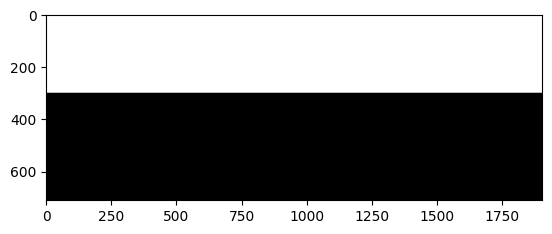

In [524]:
mask1 = 255-mask1
implot = plt.imshow(mask1, cmap='gray')

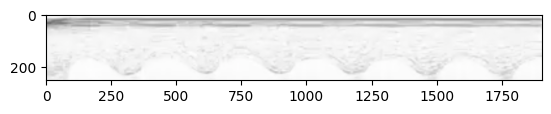

In [528]:
implot = plt.imshow(img[:250], cmap='gray')

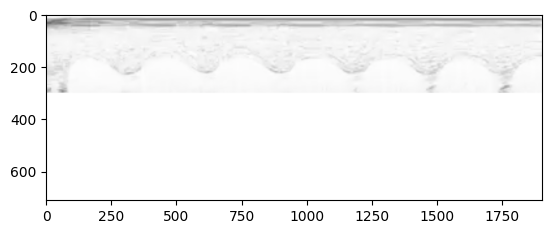

In [512]:
masked = cv2.bitwise_and(img, img, mask=mask1)
implot = plt.imshow(255-masked, cmap='gray')

In [513]:
img = 255-masked

In [598]:
bins_num = 256
 
# Get the image histogram
hist, bin_edges = np.histogram(img[:300], bins=bins_num)
 
# Get normalized histogram if it is required
# hist = np.divide(hist.ravel(), hist.max())
 
# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
 
# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
 
# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
 
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)


Otsu's algorithm implementation thresholding result:  216.19921875


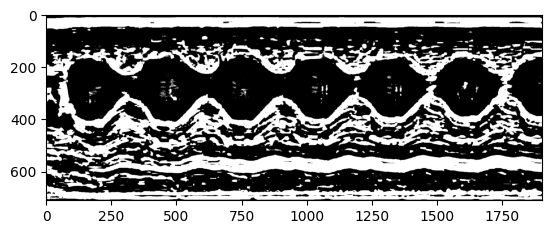

In [725]:
thresh2 = cv2.adaptiveThreshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 255, 0)
implot = plt.imshow(thresh2, cmap='gray')

contours, hierarchy  = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      
contours = sorted(contours, key=cv2.contourArea)

In [726]:
mask1 = np.ones(thresh2.shape[:2], dtype="uint8") * 255

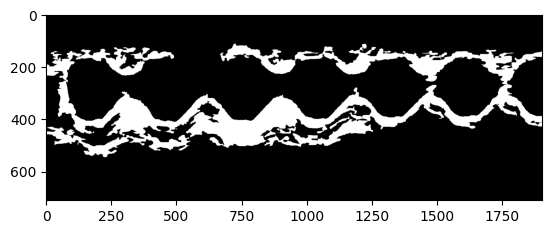

In [727]:
cv2.drawContours(mask1, [contours[-1]], -1, 255, cv2.FILLED, 1)
cv2.fillPoly(mask1, pts = [contours[-1]], color=(0,0,0))
implot = plt.imshow(255-mask1, cmap='gray')

In [655]:
otsu_threshold

216.0

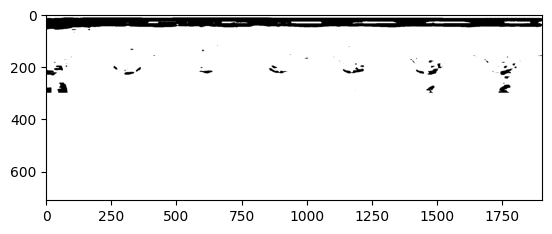

In [649]:
ret,thresh2 = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),threshold,255,cv2.THRESH_OTSU)
implot = plt.imshow(thresh2, cmap='gray')

In [15]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(img, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

In [37]:
imginv = 255-img

In [484]:
dst = cv2.fastNlMeansDenoisingColored(cv2.imread(path),None,10,10,7,21)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

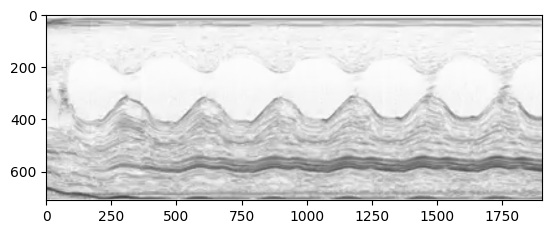

In [485]:
implot = plt.imshow(255-image_sharp, cmap='gray')


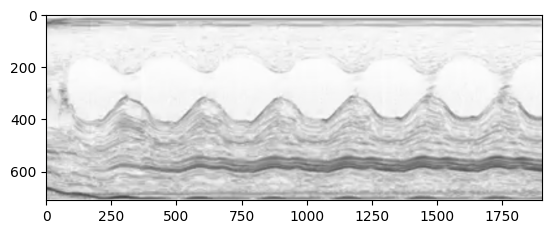

In [458]:
implot = plt.imshow(255-img, cmap='gray')


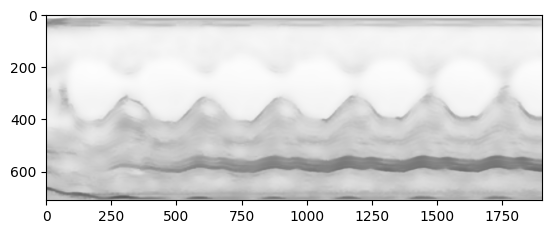

In [478]:
implot = plt.imshow(cv2.bilateralFilter(255-img,50,100,100), cmap='gray')

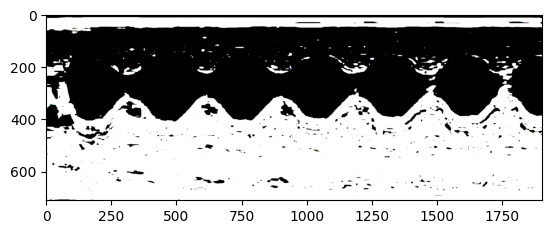

In [486]:
ret,thresh2 = cv2.threshold(img,25,255,cv2.THRESH_BINARY)
implot = plt.imshow(thresh2, cmap='gray')

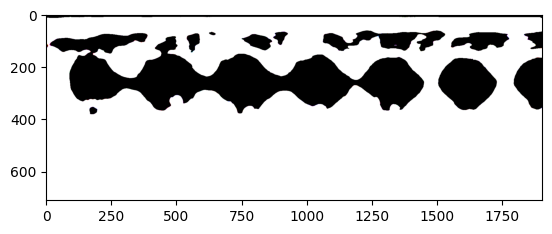

In [474]:
ret,thresh2 = cv2.threshold(cv2.bilateralFilter(img,50,75,75),10,255,cv2.THRESH_BINARY)
implot = plt.imshow(thresh2, cmap='gray')

In [295]:
contours, hierarchy  = cv2.findContours(cv2.cvtColor(thresh2, cv2.COLOR_BGR2GRAY),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      
contours = sorted(contours, key=cv2.contourArea)

In [296]:
counter = 0
for c in contours:
    area = cv2.contourArea(c)
    if (area > 10000):
        counter+=1

In [297]:
print(counter)

4


In [298]:
l = [-x for x in range(1,counter+1)]

In [299]:
countors_req = [contours[i] for i in l]
print(countors_req)

[array([[[ 92,  10]],

       [[ 91,  11]],

       [[ 40,  11]],

       ...,

       [[137,  10]],

       [[136,  11]],

       [[ 93,  11]]], dtype=int32), array([[[489, 154]],

       [[490, 153]],

       [[498, 153]],

       ...,

       [[491, 156]],

       [[492, 155]],

       [[491, 156]]], dtype=int32), array([[[1353,  164]],

       [[1354,  163]],

       [[1358,  163]],

       ...,

       [[1351,  167]],

       [[1351,  165]],

       [[1352,  164]]], dtype=int32), array([[[1603,  168]],

       [[1604,  167]],

       [[1605,  167]],

       ...,

       [[1599,  170]],

       [[1599,  169]],

       [[1600,  168]]], dtype=int32)]


In [300]:
mask1 = np.ones(thresh2.shape[:2], dtype="uint8") * 255

In [301]:
cv2.fillPoly(mask1, pts = countors_req, color=(0,0,0))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

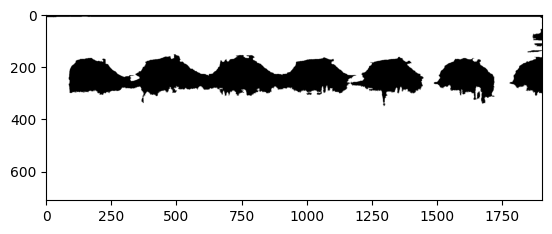

In [302]:
implot = plt.imshow(255-mask1, cmap='gray')

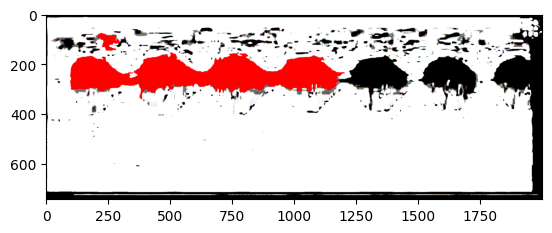

In [250]:
cv2.drawContours(thresh2, [contours[-5]], -1, 255, cv2.FILLED, 1)                                        
implot = plt.imshow(thresh2, cmap='gray')

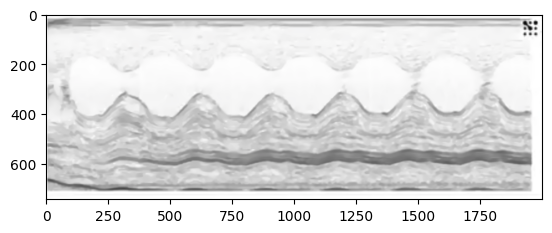

In [74]:
implot = plt.imshow(255-dst, cmap='gray')


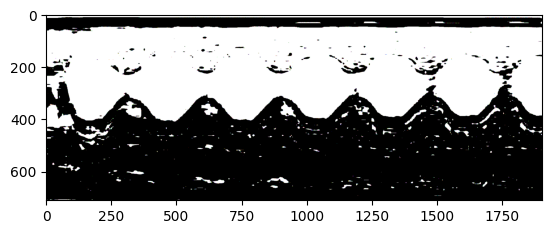

In [391]:
ret,thresh1 = cv2.threshold(img,25,255,cv2.THRESH_BINARY)
implot = plt.imshow(255-thresh1, cmap='gray')


In [328]:
thresh1.shape[:2][1]

1905

In [341]:
mask1 = np.ones(thresh1.shape[:2], dtype="uint8") * 255

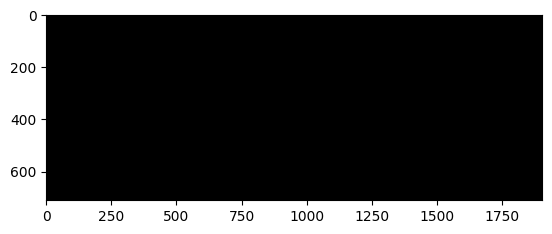

In [342]:
implot = plt.imshow(mask1, cmap='gray')

In [448]:
NUM = 200
mask1 = np.ones(thresh1.shape[:2], dtype="uint8") * 255
cv2.rectangle(mask1, (0, 0), (thresh1.shape[:2][1], 250), 0, -1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

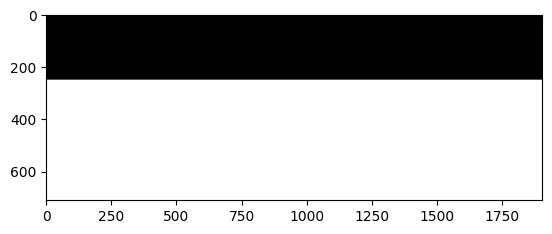

In [449]:
implot = plt.imshow(mask1, cmap='gray')

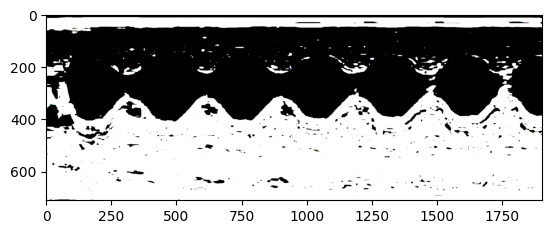

In [436]:
implot = plt.imshow(thresh1, cmap='gray')

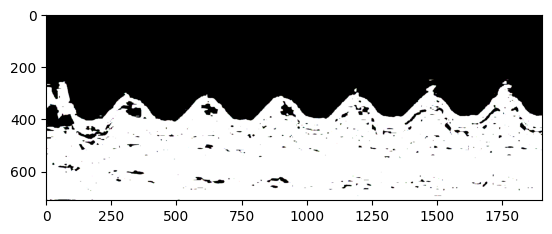

In [450]:
ret,thresh1 = cv2.threshold(img,25,255,cv2.THRESH_BINARY)
masked = cv2.bitwise_and(thresh1, thresh1, mask=mask1)
implot = plt.imshow(masked, cmap='gray')

In [442]:
contours, hierarchy  = cv2.findContours(cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      
contours = sorted(contours, key=cv2.contourArea)

In [443]:
counter = 0
for c in contours:
    area = cv2.contourArea(c)
    if (area > 10000):
        counter+=1

In [444]:
l = [-x for x in range(1,counter+1)]
countors_req = [contours[i] for i in l]
print(len(countors_req))

1


In [445]:
mask1 = np.ones(thresh1.shape[:2], dtype="uint8") * 255

In [446]:
cv2.fillPoly(mask1, pts = countors_req, color=(0,0,0))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

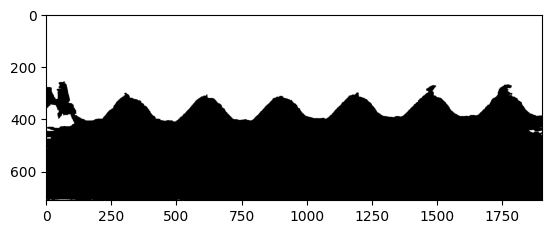

In [447]:
implot = plt.imshow(mask1, cmap='gray')

In [422]:
ret,thresh1 = cv2.threshold(img,25,255,cv2.THRESH_BINARY)
fig = cv2.bitwise_and(thresh1, 255-thresh1, mask=mask1)

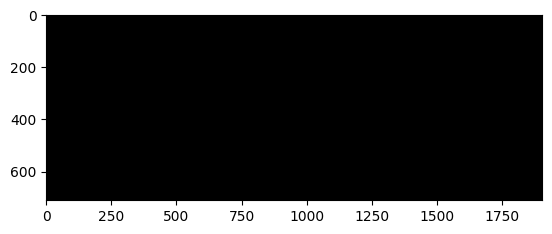

In [423]:
implot = plt.imshow(fig, cmap='gray')

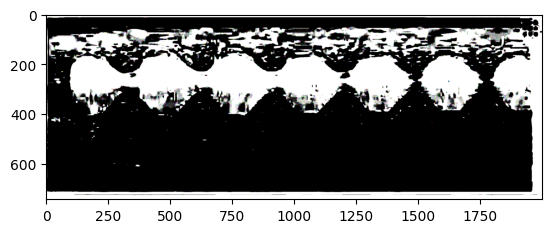

In [121]:
ret,thresh1 = cv2.threshold(img,10,255,cv2.THRESH_BINARY)
implot = plt.imshow(255-thresh1, cmap='gray')

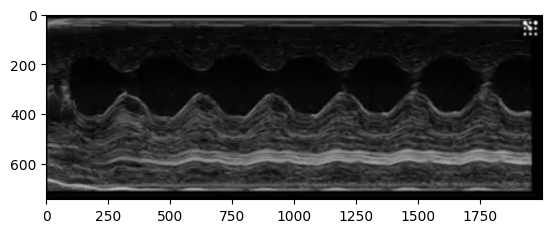

In [79]:
implot = plt.imshow(img, cmap='gray')

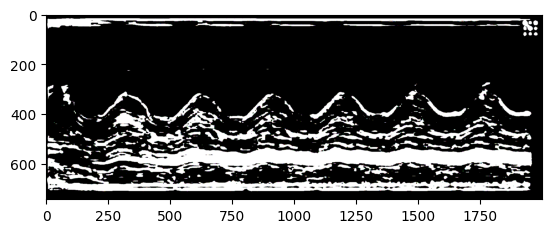

In [208]:
# LOWER LINE
ret,thresh1 = cv2.threshold(img,60,255,cv2.THRESH_BINARY)
implot = plt.imshow(thresh1, cmap='gray')

In [209]:
contours, hierarchy  = cv2.findContours(cv2.cvtColor(thresh1, cv2.COLOR_BGR2GRAY),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)            

In [210]:
contours = sorted(contours, key=cv2.contourArea)            
print(contours[-1])

[[[1163  514]]

 [[1162  515]]

 [[1161  515]]

 ...

 [[1185  515]]

 [[1181  515]]

 [[1180  514]]]


In [270]:
print(contours[len(contours)-1])

[[[ 92  10]]

 [[ 91  11]]

 [[ 40  11]]

 ...

 [[137  10]]

 [[136  11]]

 [[ 93  11]]]


In [226]:
mask2 = np.ones(thresh1.shape[:2], dtype="uint8") * 255

In [227]:
cv2.drawContours(mask2, contours[-1], -1, 0, -1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [228]:
cv2.fillPoly(mask2, pts =[contours[-1]], color=(0,0,0))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

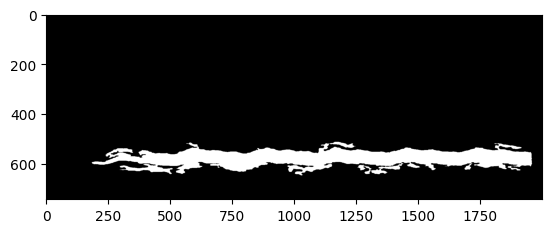

In [230]:
implot = plt.imshow(255-mask2, cmap='gray')

In [ ]:
image = cv2.bitwise_and(thresh1, thresh1, mask=mask2)
implot = plt.imshow(mask2, cmap='gray')

In [173]:
mask3 = np.ones(img.shape[:2], dtype="uint8") * 255

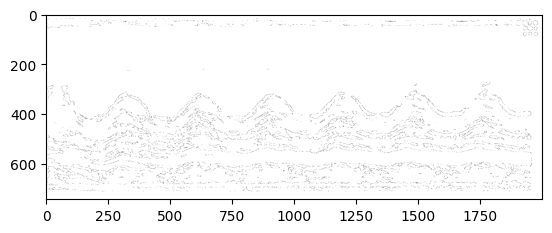

In [189]:
for c in contours:
    cv2.drawContours(mask3, c, -1, 0, -1)

implot = plt.imshow(mask3, cmap='gray')

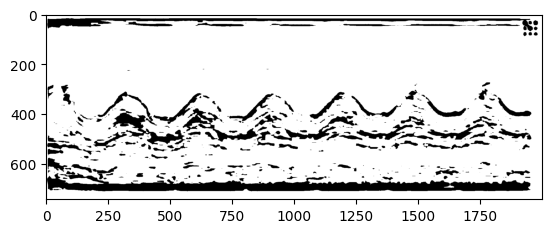

In [205]:
implot = plt.imshow(mask2, cmap='gray')

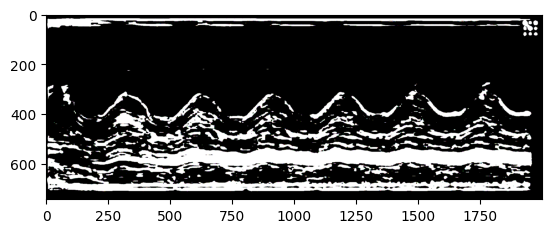

In [206]:
implot = plt.imshow(thresh1, cmap='gray')

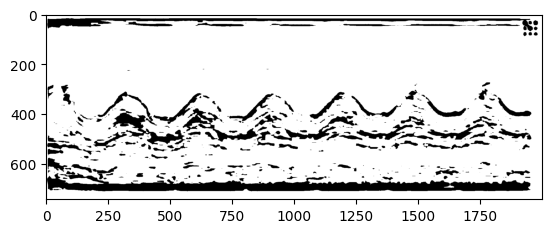

In [192]:
implot = plt.imshow(mask2, cmap='gray')

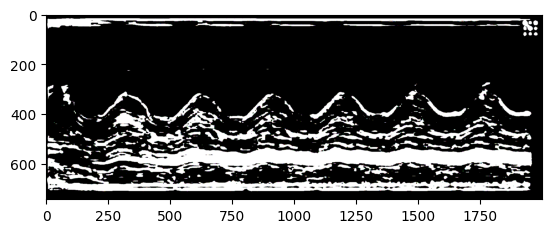

In [207]:
image = cv2.bitwise_and(thresh1, thresh1, mask2)
implot = plt.imshow(thresh1, cmap='gray')

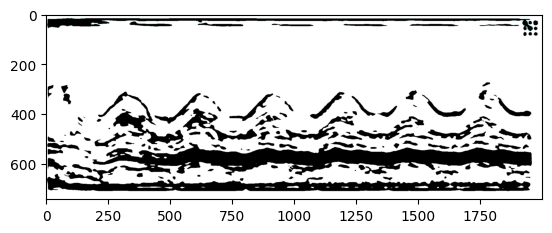

In [151]:
cv2.drawContours(thresh1, contours[-1], -1, 255, cv2.FILLED, 1)
implot = plt.imshow(255-thresh1, cmap='gray')

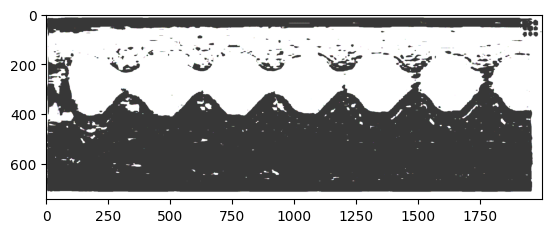

In [87]:
ret,thresh1 = cv2.threshold(img,20,200,cv2.THRESH_BINARY)
implot = plt.imshow(255-thresh1, cmap='gray')

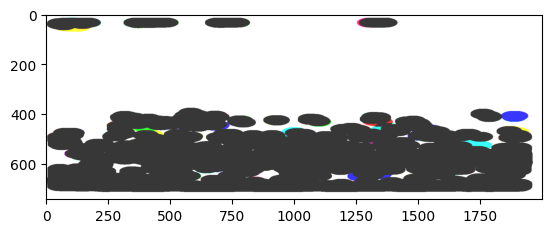

In [35]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(100,40))
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (45,45))
mask = cv2.morphologyEx(255-thresh1, cv2.MORPH_CLOSE, kernel)
implot = plt.imshow(mask, cmap='gray')

In [192]:
def _bbAndMask(image, cnts):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.axis('off')
  ax2.axis('off')
  _bbox(image, cnts, ax1)
  _maskOutline(image, cnts, ax2)
  st.pyplot(fig)

In [193]:
def _heatmap(image, cnts):
  fig2 = plt.figure()
  plt.axis('off')
  hm = st.slider("slider for heatmap", min_value=0.0, max_value=1.0, step=0.1, value=0.5)
  img = _drawMask(image, cnts)
  plt.imshow(img, alpha=hm)
  plt.imshow(image, alpha=1-hm)
  plt.title("heatmap")
  st.pyplot(fig2)

In [194]:
def _bbox(image, cnts, ax):
  ax.imshow(image)
  for c in cnts:
    area = cv2.contourArea(c)
    if area < 10:
      continue
    [x, y, w, h] = cv2.boundingRect(c)
    ax.add_patch(Rectangle((x, y), w, h, color = "red", fill = False))

In [39]:
def _drawMask(image, cnts, fill=True):
  image = np.array(image)
  markers = np.zeros((image.shape[0], image.shape[1]))
  heatmap_img = cv2.applyColorMap(image, cv2.COLORMAP_JET)
  t = 2
  if fill:
    t = -1
  cv2.drawContours(markers, cnts, -1, (255, 0, 0), t)
  mask = markers>0
  image[mask,:] = heatmap_img[mask,:]
  return image

In [40]:
def _maskOutline(image, cnts, ax):
  img = _drawMask(image, cnts, False)
  ax.imshow(img)

In [163]:
type(mask)

numpy.ndarray

In [50]:
plt.imshow(255-mask, cmap='gray')

In [1]:
_ , contours, _ = cv2.findContours(mask,2,1)            
implot = plt.imshow(255-contours, cmap='gray')

NameError: name 'cv2' is not defined

2022-12-17 12:19:58.280 
  command:

    streamlit run /Users/arnau/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]


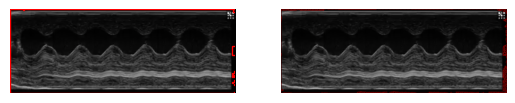

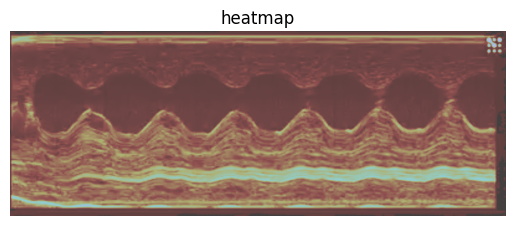

In [42]:
mask = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cnts,_= cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
_bbAndMask(img, cnts)
_heatmap(img, cnts)

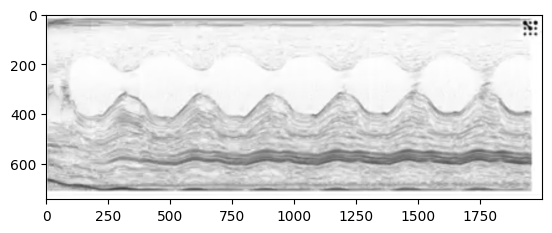

In [142]:
implot = plt.imshow(255-img, cmap='gray')

In [ ]:
se = strel('disk',10);
closeBW = imclose(originalBW,se);
figure, imshow(closeBW)

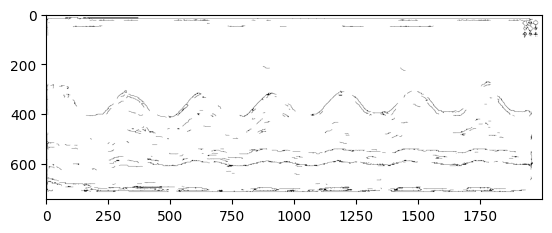

In [18]:
implot = plt.imshow(255-edged, cmap='gray')

In [7]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

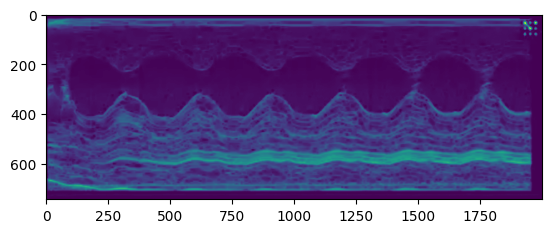

In [8]:
implot = plt.imshow(erosion)

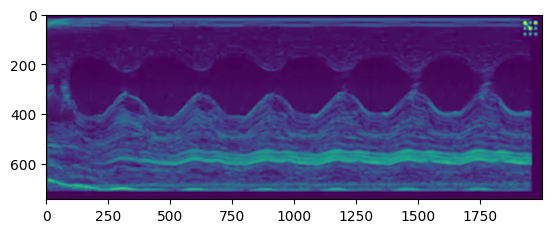

In [9]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
implot = plt.imshow(opening)

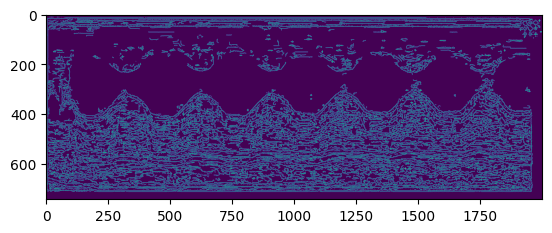

In [89]:
canny = cv2.Canny(img, 30, 10)
implot = plt.imshow(canny)